2022-09-17 13:21:58.971353: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-09-17 13:21:59.062565: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-09-17 13:21:59.062580: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


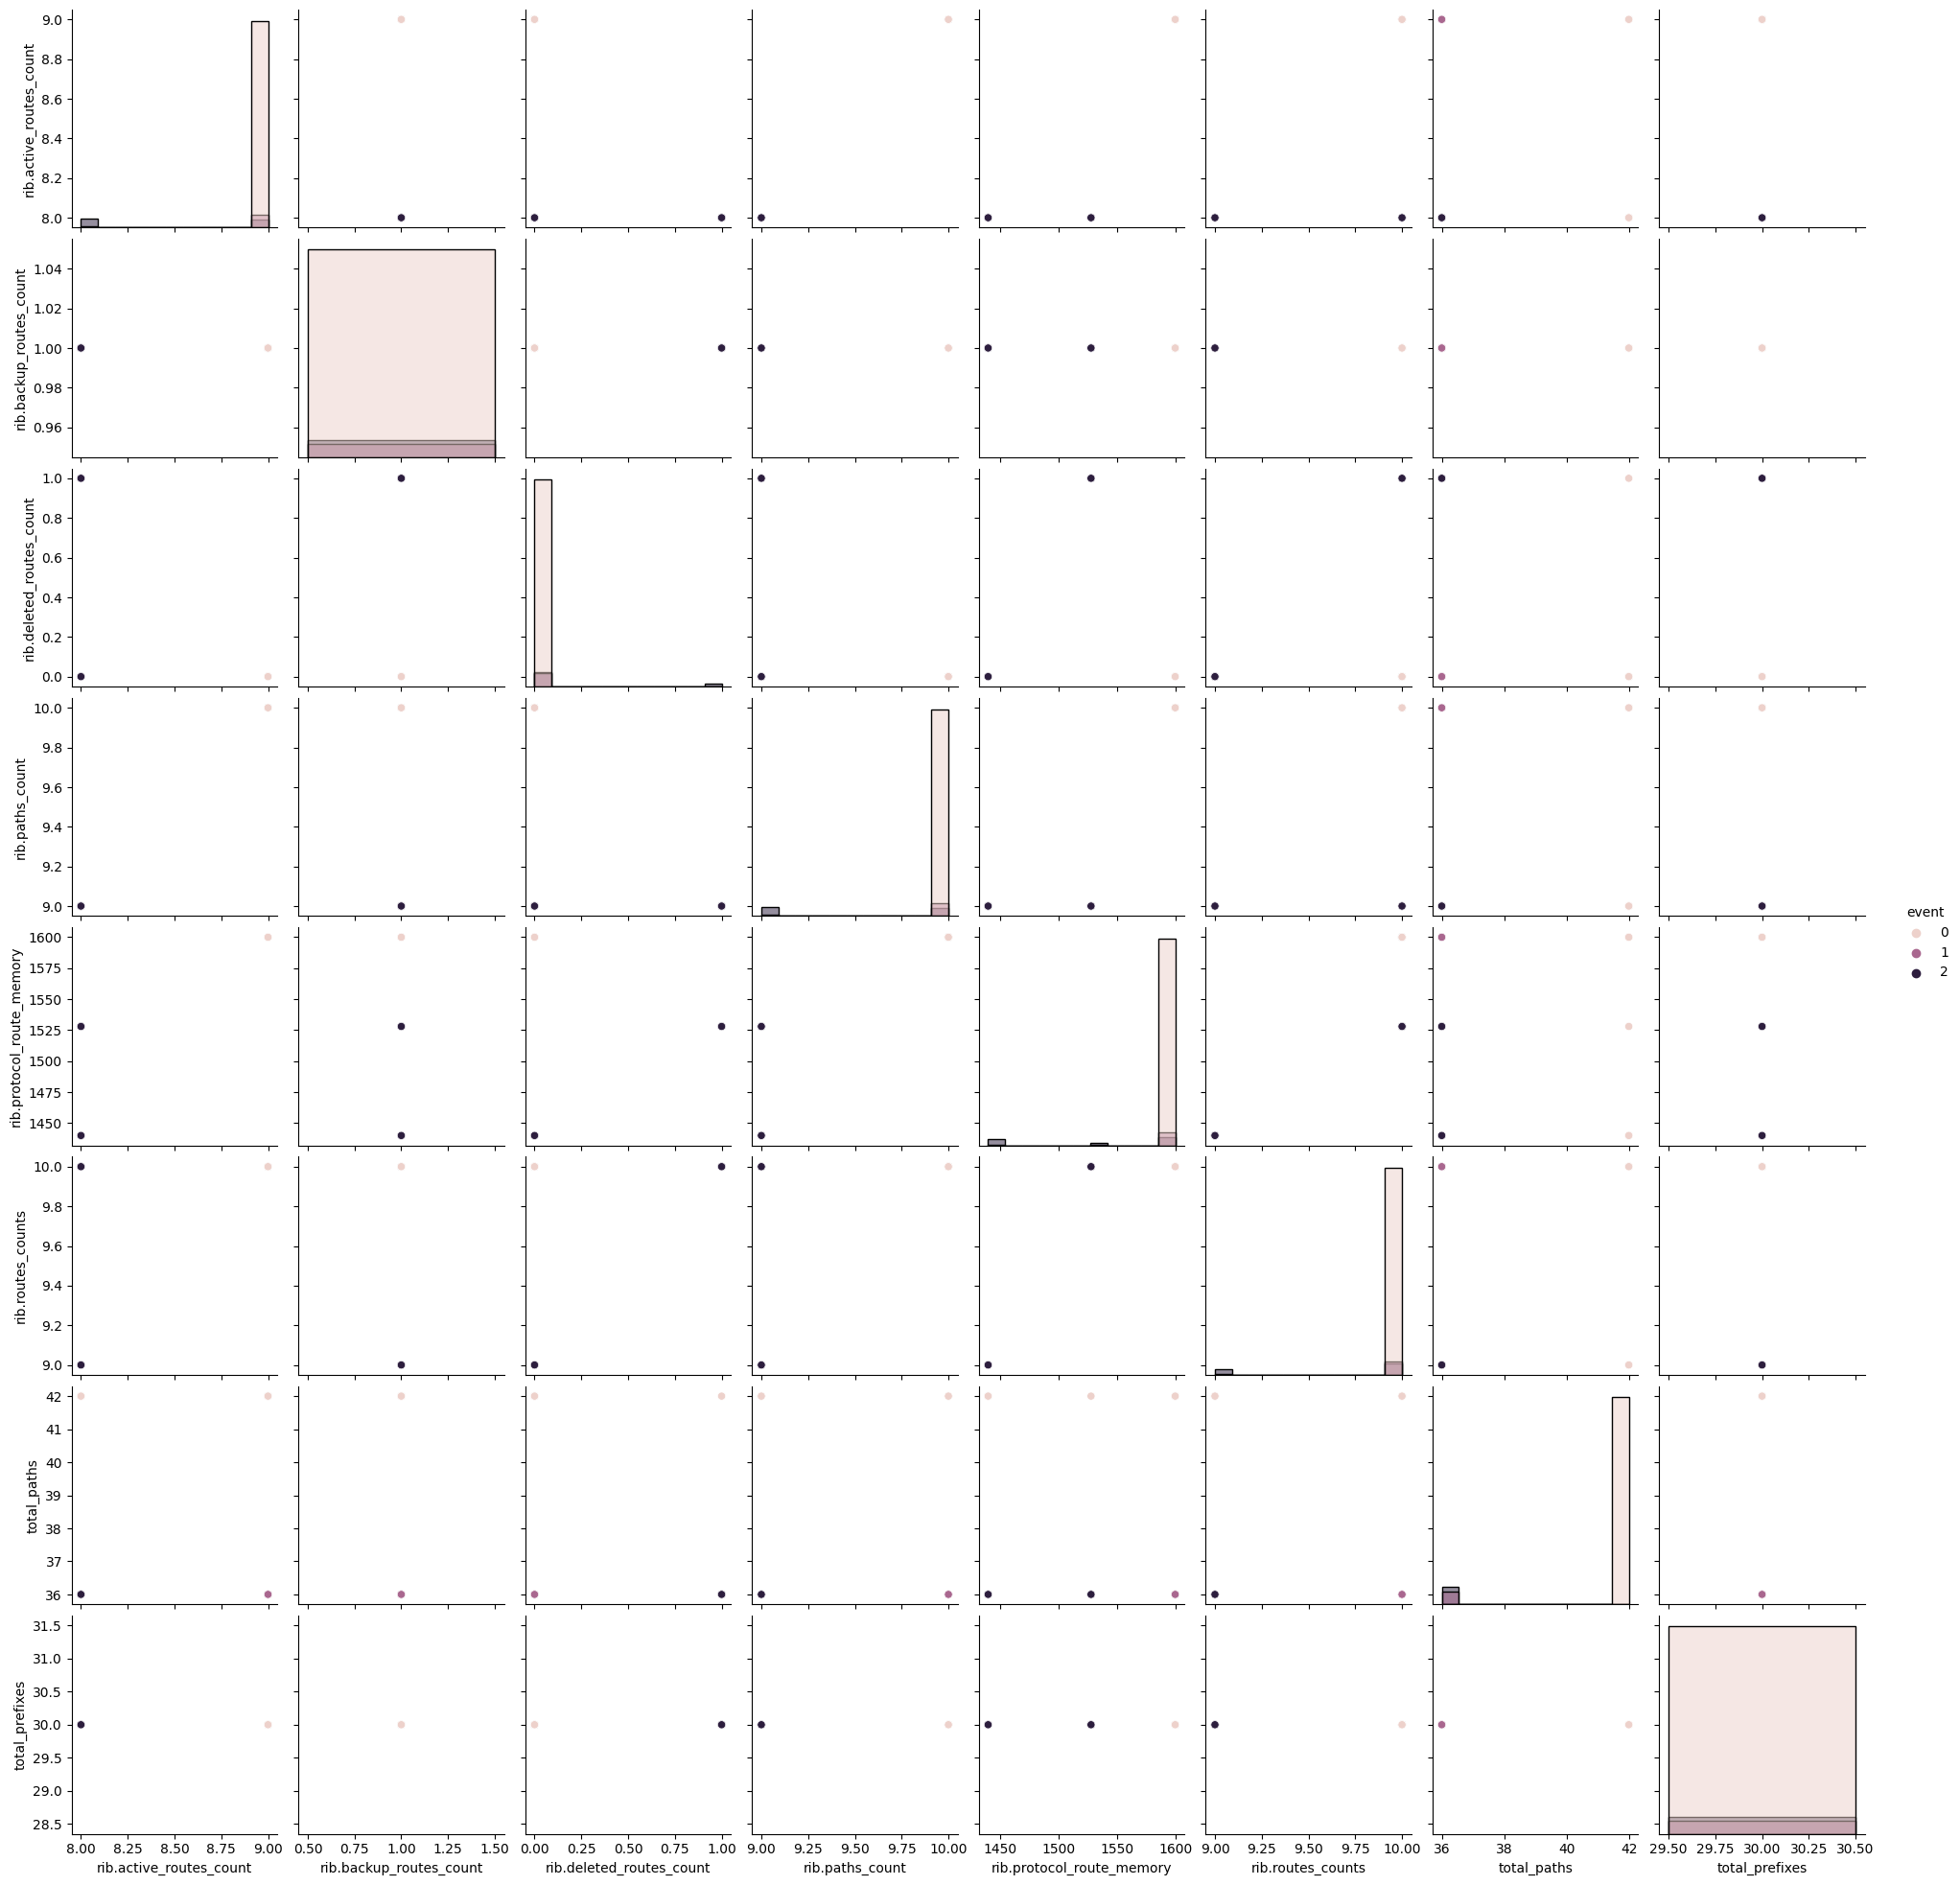

In [1]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.callbacks import ModelCheckpoint
from tensorflow import keras
from keras import metrics
from keras import losses
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
import matplotlib as plt
import seaborn as sns

dataset = pd.read_csv('routers_history_mixdataset.csv')

dataset = dataset.fillna(0)

name = '1.1.1.2'
filter = dataset['router_id'] == name
dataset = dataset[filter]




X = dataset.drop(columns=['event', 'router_id'])
y = dataset['event']

X.columns

feature_cols = ['rib.active_routes_count', 'rib.backup_routes_count',
                'rib.deleted_routes_count', 'rib.paths_count',
                'rib.protocol_route_memory', 'rib.routes_counts', 'router_id',
                'total_paths', 'total_prefixes']


dataset = dataset.drop(columns=['router_id'])
#dataset = (dataset - dataset.min())/(dataset.max()-dataset.min())

sns.pairplot(data=dataset, hue='event', diag_kind='hist')


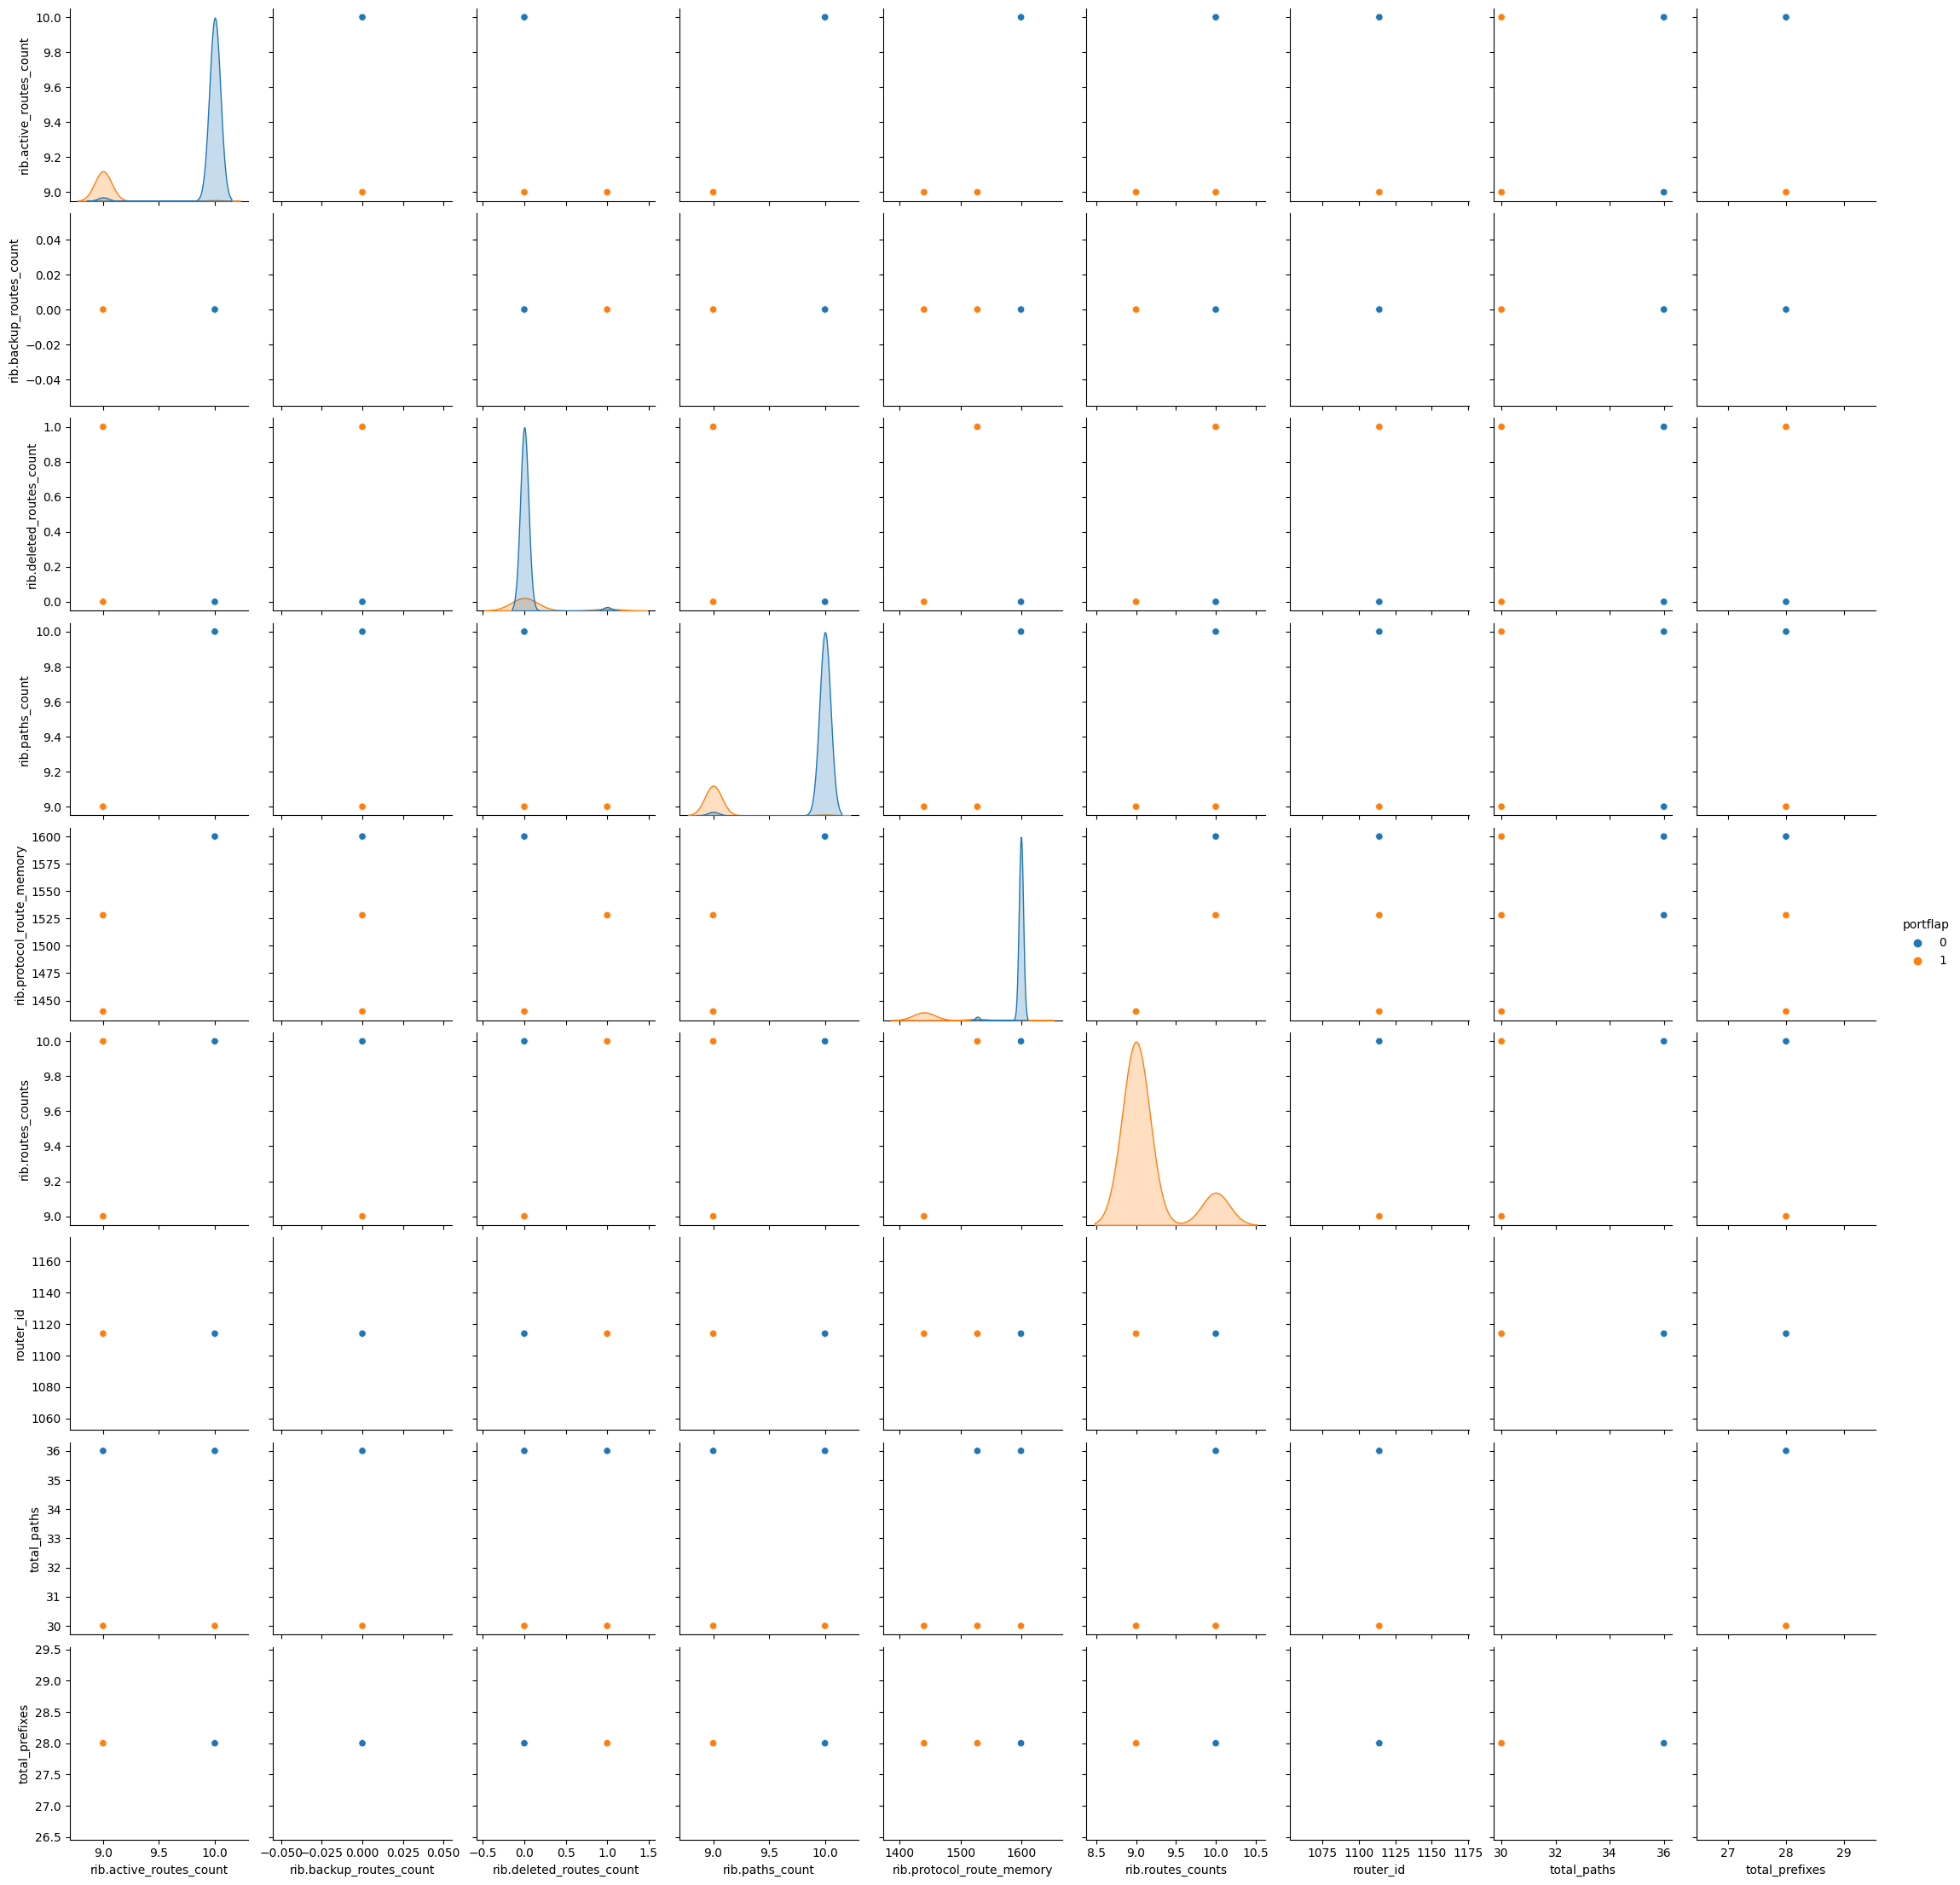

In [377]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.callbacks import ModelCheckpoint
from tensorflow import keras
from keras import metrics
from keras import losses
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
import matplotlib as plt
import seaborn as sns


dataset = pd.read_csv('portflap_dataset.csv')

dataset = dataset.fillna(0)

dataset.describe()
name = 1114
filter = dataset['router_id'] == name
dataset = dataset[filter]

X = dataset.drop(columns=['portflap', 'date_modified',
                 'interfaces', 'fib.node_name', 'rib.as_number'])
y = dataset['portflap']

X.columns


sns.pairplot(data=dataset, hue= 'portflap')

In [629]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import joblib
import time

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, shuffle=True)


model = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None)
model.fit(X_train,y_train)
predictions = model.predict(X_test)
joblib.dump(model, 'final'+str(name)+'.joblib')

score = accuracy_score(y_test,predictions)
print(score)
    

0.9813664596273292


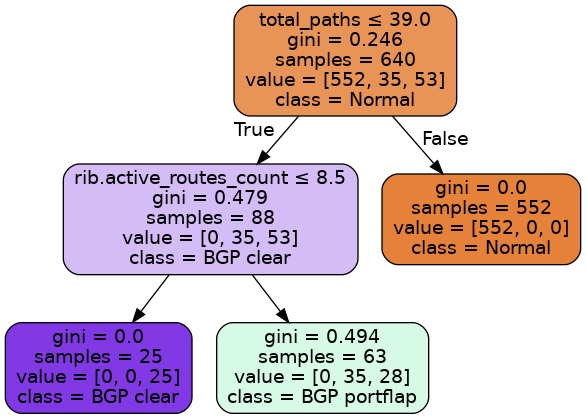

In [71]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
feature_cols = ['rib.active_routes_count', 'rib.backup_routes_count',
                'rib.deleted_routes_count', 'rib.paths_count',
                'rib.protocol_route_memory', 'rib.routes_counts',
                'total_paths', 'total_prefixes']
export_graphviz(model, out_file=dot_data,
filled=True, rounded=True, special_characters=True,
feature_names=feature_cols, class_names=['Normal','BGP portflap','BGP clear'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('anomalies.png')

Image(graph.create_png())

In [86]:
import requests
import json
from datetime import datetime


response_API1 = requests.get(
    'https://ms-data-manager.herokuapp.com/routers_history/1.1.1.2', verify=False)
data1 = response_API1.text
routers = json.loads(data1)
finish = len(routers)
dataset = []
start = len(routers)-3
i=0
if routers is not None:
     for router in routers:
        data = [0, 0, 0, 0, 0, 0, 0, 0]
        #if i > start and i < finish:
        if router["rib"] is not None:
            router_id = router['router_id']
            router_id = int(router_id.split('.')[3])+1110
            data[0] = int(router["rib"]["active_routes_count"])
            data[1] = int(router["rib"]["backup_routes_count"])
            data[2] = int(router["rib"]["deleted_routes_count"])
            data[3] = int(router["rib"]["paths_count"])
            data[4] = int(router["rib"]["protocol_route_memory"])
            data[5] = int(router["rib"]["routes_counts"])
            #data[6] = router_id
            data[6] = int(router['total_paths'])
            data[7] = int(router['total_prefixes'])
        dataset.append(data)

        i = i + 1

t1= datetime.now()
model = joblib.load('final'+str(name)+'.joblib')

predictions = model.predict(dataset)
t2 = datetime.now()
print(predictions)
total = t2-t1

print('Cantidad de set de datos: '+str(len(dataset))+' Tiempo total: '+ str(total)+' Tiempo promedio por predicción: '+ str(total/len(dataset)))


/usr/lib/python3/dist-packages/urllib3/connectionpool.py:1015: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ms-data-manager.herokuapp.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


[0 0 0 ... 0 0 0]
Cantidad de set de datos: 1095 Tiempo total: 0:00:00.001277 Tiempo promedio por predicción: 0:00:00.000001


/home/wayala/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [1]:
dataset = []
response_API1 = requests.get(
        'https://ms-data-manager.herokuapp.com/routers/1.1.1.4', verify=False)
data1 = response_API1.text
router = json.loads(data1)
if router is not None:
    data = [0, 0, 0, 0, 0, 0, 0, 0, 0]
    if router["rib"] is not None:
        router_id = router['router_id']
        router_id = int(router_id.split('.')[3])+1110
        data[0] = int(router["rib"]["active_routes_count"])
        data[1] = int(router["rib"]["backup_routes_count"])
        data[2] = int(router["rib"]["deleted_routes_count"])
        data[3] = int(router["rib"]["paths_count"])
        data[4] = int(router["rib"]["protocol_route_memory"])
        data[5] = int(router["rib"]["routes_counts"])
        data[6] = router_id
        data[7] = int(router['total_paths'])
        data[8] = int(router['total_prefixes'])
    dataset.append(data)
    print(data)

model = joblib.load('portflap'+str(router_id)+'.joblib')

predictions = model.predict(dataset)
if predictions[0] == 0:
    result = 'normal'
else:
    result='portflap'

print(result)


NameError: name 'requests' is not defined